In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


C:\Users\Thomas Athey\Documents\Labs\Labs\jovo\dos_and_donts


In [5]:
import numpy as np
from math import sqrt
from scipy.stats import pearsonr
from graspy.plot import heatmap
from sklearn.covariance import GraphicalLassoCV
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
np.random.seed(0)

In [13]:
def calc_values(n,m,t,noise_sig):
    #Generate x data

    data = np.random.normal(0,1,(n-1,t,m))
    n0 = np.expand_dims(data[0,:,:] + data[1,:,:],axis=0)
    data = np.concatenate((n0,data),axis=0)
    
    #Create connectomes and generate y from connection 0-1
    connectomes = []
    y = []

    for subject in range(m):
        connectome = np.corrcoef(data[:,:,subject])
        connectomes.append(connectome)
        y.append(connectome[0,1] + np.random.normal(0,noise_sig))

    connectomes = np.stack(connectomes,axis=2)
    y = np.array(y)
    
    
    #Create feature vector which contains y and all connections
    features = []
    features.append(y)

    for i in range(0,n):
        for j in range(i+1,n):
            edges = connectomes[i,j,:]
            features.append(edges)

    features = np.stack(features,axis=1)
    
    #All************************************graphical lasso
    inds = np.triu_indices(n=n,k=1)

    model = GraphicalLassoCV(cv=3)
    model.fit(features)
    cov_ = model.covariance_
    diags = np.power(np.diagonal(cov_),-1/2)
    scale = np.diag(diags)
    feature_corr_ = scale @ cov_ @ scale

    edge_corrs = np.zeros((n,n))
    edge_corrs[inds] = feature_corr_[0,1:]
    edge_corrs = edge_corrs + edge_corrs.T
    
    prec_ = model.precision_
    diags = np.power(np.diagonal(cov_),1/2)
    scale = np.diag(diags)
    feature_invcorr_ = scale @ prec_ @ scale
    
    
    edge_invcorrs = np.zeros((n,n))
    edge_invcorrs[inds] = feature_invcorr_[0,1:]
    edge_invcorrs = edge_invcorrs + edge_invcorrs.T
    
    return edge_corrs[0,1], edge_corrs[1,2], edge_invcorrs[0,1], edge_invcorrs[1,2]

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.971156255210608e-09, tolerance: 3.7085139075995973e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.225184113277239e-08, tolerance: 5.858916918467035e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.316227804514571e-10, tolerance: 8.968666924666473e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.118150348260489e-09, tolerance: 3.3435880392385335e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.884801043801741e-09, tolerance: 6.314532550917907e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.435636711633416e-09, tolerance: 3.3435880392385335e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.794540411732663e-10, tolerance: 5.112845780125926e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.241671735359889e-09, tolerance: 4.6084676525170297e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.662933694021433e-10, tolerance: 4.1779169518623647e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.777662302764662e-09, tolerance: 7.5059108374467e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.263333105725437e-09, tolerance: 3.8099338249639656e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.469384620366337e-09, tolerance: 3.567624583259094e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Ob

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.9255284371877446e-09, tolerance: 8.4942252907371e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.747857125589645e-09, tolerance: 3.617509784252169e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.836071955220678e-09, tolerance: 4.1855420600240997e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: O

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.375963832952857e-09, tolerance: 4.700038039985726e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.066362651114486e-09, tolerance: 7.898170079275821e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.098639969055966e-09, tolerance: 3.398992784973388e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: O

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3029612904179597e-09, tolerance: 8.543507979395254e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.638007303053247e-09, tolerance: 5.601044248500047e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.885819645221833e-09, tolerance: 4.3504688525653703e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

Text(0.5, 1.0, 'InvCorr of Edge 1-2 with Y')

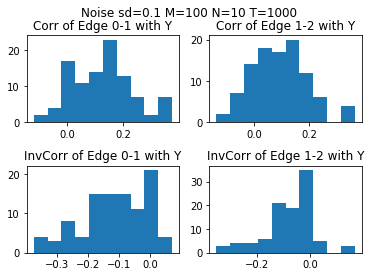

In [15]:
#Null distribution of what we are doing
n_iter = 100
sd = 0.1
n=10
m=100
t=1000

null_distributions = np.zeros((4,n_iter))

for i in range(n_iter):
    a,b,c,d = calc_values(n,m,t,sd)

    null_distributions[0,i] = a
    null_distributions[1,i] = b
    null_distributions[2,i] = c
    null_distributions[3,i] = d

fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.5)
ttl = 'Noise sd=' + str(sd) + ' M=' + str(m) + ' N=' + str(n) + ' T=' + str(t)
fig.suptitle(ttl)
axs[0,0].hist(null_distributions[0,:])
axs[0,0].set_title('Corr of Edge 0-1 with Y')
axs[0,1].hist(null_distributions[1,:])
axs[0,1].set_title('Corr of Edge 1-2 with Y')
axs[1,0].hist(null_distributions[2,:])
axs[1,0].set_title('InvCorr of Edge 0-1 with Y')
axs[1,1].hist(null_distributions[3,:])
axs[1,1].set_title('InvCorr of Edge 1-2 with Y')

